In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
#100 points
points = pd.read_excel('data.xlsx')
X = points[['X', 'Y', 'Z']]
Y = points['Category']
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = rs)

In [3]:
clf = LogisticRegression(random_state = rs, multi_class = 'multinomial').fit(X_train, y_train)

In [4]:
y_pred = clf.predict(X)

In [5]:
print(classification_report(y_pred, Y))

              precision    recall  f1-score   support

           1       0.62      0.67      0.65      2286
           2       0.95      0.95      0.95      7278
           3       0.88      0.84      0.86      4233

    accuracy                           0.87     13797
   macro avg       0.82      0.82      0.82     13797
weighted avg       0.87      0.87      0.87     13797



In [6]:
X_vis = X.copy()
X_vis['predictions'] = y_pred
X_vis['Categories'] = Y
X_vis.head()

,X,Y,Z,predictions,Categories
0,615.0,839.0,2478.79,2,2
1,615.0,839.0,2477.79,2,2
2,615.0,839.0,2476.79,2,2
3,615.0,839.0,2475.79,2,2
4,615.0,839.0,2474.79,2,2


In [7]:
y_vis = np.array(X_vis['predictions'])

In [8]:
points_pred = clf.predict(points[['X', 'Y', 'Z']])
points['predictions'] = points_pred

In [9]:
first_proba = clf.predict_proba(points[['X', 'Y', 'Z']])[:, 0]
second_proba = clf.predict_proba(points[['X', 'Y', 'Z']])[:, 1]
third_proba = clf.predict_proba(points[['X', 'Y', 'Z']])[:, 2]
points['1_proba'], points['2_proba'], points['3_proba'] = first_proba, second_proba, third_proba

In [10]:
arr_proba = []
probas = clf.predict_proba(points[['X', 'Y', 'Z']])
cnt = 0
for i in points['predictions']:
    arr_proba.append(probas[cnt, i - 1])
    cnt+= 1
points['proba_final'] = arr_proba

In [11]:
points.head()

,X,Y,Z,Category,Ind1,Ind2,Ind3,predictions,1_proba,2_proba,3_proba,proba_final
0,615.0,839.0,2478.79,2,0,1,0,2,0.003185,0.993034,0.003781,0.993034
1,615.0,839.0,2477.79,2,0,1,0,2,0.003170,0.993053,0.003777,0.993053
2,615.0,839.0,2476.79,2,0,1,0,2,0.003154,0.993072,0.003774,0.993072
3,615.0,839.0,2475.79,2,0,1,0,2,0.003138,0.993092,0.003770,0.993092
4,615.0,839.0,2474.79,2,0,1,0,2,0.003123,0.993111,0.003767,0.993111


In [12]:
#points.to_excel('100_with_proba.xlsx')

In [13]:
#90 k 
grid = pd.read_excel('grid.xlsx')
grid.head()

,X,Y,Z
0,157.87,210,1910.73
1,167.87,210,1910.73
2,177.87,210,1910.73
3,187.87,210,1910.73
4,197.87,210,1910.73


In [14]:
grid_pred = clf.predict(grid[['X', 'Y', 'Z']])
grid['predictions'] = grid_pred

In [15]:
first_proba = clf.predict_proba(grid[['X', 'Y', 'Z']])[:, 0]
second_proba = clf.predict_proba(grid[['X', 'Y', 'Z']])[:, 1]
third_proba = clf.predict_proba(grid[['X', 'Y', 'Z']])[:, 2]
grid['1_proba'], grid['2_proba'], grid['3_proba'] = first_proba, second_proba, third_proba

In [17]:
arr_proba = []
probas = clf.predict_proba(grid[['X', 'Y', 'Z']])
cnt = 0
for i in data(['predictions']):
    arr_proba.append(probas[cnt, i - 1])
    cnt+= 1
grid['proba_final'] = arr_proba

NameError: name 'data' is not defined

In [18]:
grid

,X,Y,Z,predictions,1_proba,2_proba,3_proba
0,157.87,210,1910.73,1,9.868499e-01,0.006815,6.335452e-03
1,167.87,210,1910.73,1,9.853078e-01,0.007055,7.637384e-03
2,177.87,210,1910.73,1,9.834943e-01,0.007301,9.204300e-03
3,187.87,210,1910.73,1,9.813568e-01,0.007554,1.108899e-02
4,197.87,210,1910.73,1,9.788332e-01,0.007813,1.335427e-02
...,...,...,...,...,...,...,...
709795,887.87,1500,2600.73,2,8.193039e-09,1.000000,3.145108e-07
709796,897.87,1500,2600.73,2,7.901739e-09,1.000000,3.662347e-07
709797,907.87,1500,2600.73,2,7.620796e-09,1.000000,4.264650e-07
709798,917.87,1500,2600.73,2,7.349842e-09,0.999999,4.966006e-07


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred_test = model.predict(X_test)

In [27]:
y_predict = model.predict(grid[['X','Y', 'Z']])
grid['predict'] = y_predict

In [28]:
y_vis_2 = np.array(grid['proba_final'])

In [29]:
from matplotlib.colors import ListedColormap
cmap_bold_2 = ListedColormap(['none'])

C:\Users\Almas Amirzhan\AppData\Local\Temp\ipykernel_3460\355476772.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])


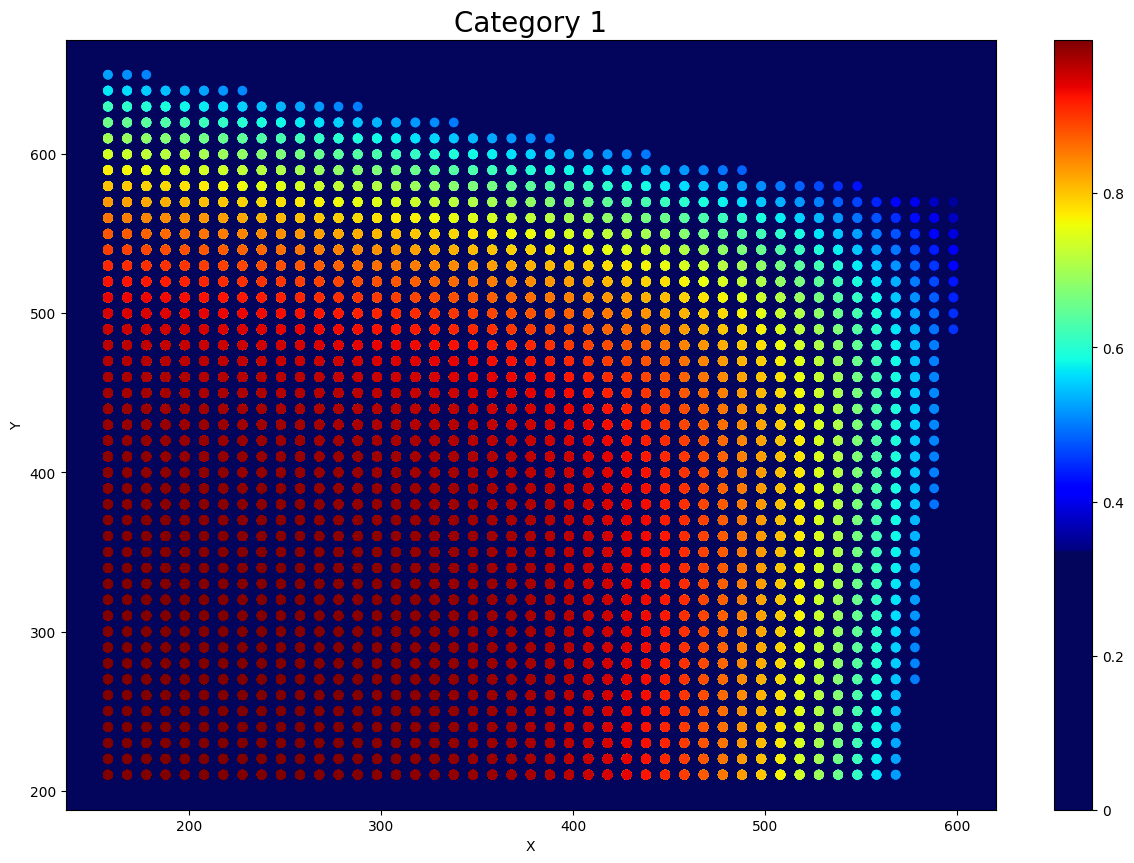

In [46]:
#fig = plt.figure(facecolor='blue')
plt.figure(figsize = (15,10))
plt.scatter(grid[grid.predict==2].X, grid[grid.predict==2].Y, c = grid[grid.predict==2].proba_final, cmap='jet')
#plt.scatter(points['X'], points['Y'], c = y_vis_2, cmap = 'jet', edgecolors='w' )
plt.title('Category 1', size=20)
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()
cbar.ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
cbar.ax.set_ylim(bottom=0)
plt.rcParams['axes.facecolor']='#03045c'
#plt.fill(150, 150, "b") 
ax = plt.gca()
#ax.set_xlim([0, 300])
#ax.set_ylim([0, 300])
#plt.xticks(range(0,350,50))